In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt # plotting
import PdM_functions as pdm 
import re
import os 

In [5]:
test1_fp = 'data/NASA Bearings Full/1st_test/1st_test'
test2_fp = 'data/NASA Bearings Full/2nd_test/2nd_test'
test3_fp = 'data/NASA Bearings Full/3rd_test/3rd_test'
test4_fp = 'data/NASA Bearings Full/3rd_test/4th_test/txt'

test2_mean_fp = 'data/NASA Bearings Reduced'

t1_chans = ['B1_c1', 'B1_c2', 'B2_c3', 'B2_c4', 'B3_c5', 'B3_c6', 'B4_c7', 'B4_c8']
t2_chans = ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4']
t3_chans = ['B1_c1', 'B2_c2', 'B3_c3', 'B4_c4']

### Create Combined Data Files

In [599]:
set_dir = test1_fp
set_ref = 'test1_abs'

In [600]:
SAMPLING_RATE = 0.05 # milliseconds

In [601]:
filenames = sorted([name for name in os.listdir(set_dir)])

In [602]:
# Simple slicer vector
nrows = 20480
sample_win = 10 # Take data at roughly 0.1s steps (10Hz) 
split_incr = nrows / (sample_win - 1)
slicer = []
sl = 0
for i in range(sample_win):
        slicer.append(int(sl))
        sl += split_incr
print(slicer)

[0, 2275, 4551, 6826, 9102, 11377, 13653, 15928, 18204, 20479]


In [330]:
# Range not fit for purpose
# slicer = range(start, stop + 1, step)

In [611]:
# Explanation of reduced files
test = pd.read_csv(os.path.join('data/NASA Bearings Full/1st_test/1st_test', '2003.10.22.12.06.24'), sep = "\t", header = None)

# Each 1 sec file is reduced to the mean of the absolute value of each column
test[0].abs().mean()

0.10414384765624869

In [603]:
use_abs = True
df_set = pd.DataFrame()
for count, fn in enumerate(filenames[0:10]):
    print('File ' + str(count + 1) + ' of '  + str(len(filenames)))
    df = pd.read_csv(os.path.join(set_dir, fn), sep = "\t", header = None)
    nrows = len(df)
    
    # Derive timestamp field
    dt = pd.to_datetime(fn +'.000', format='%Y.%m.%d.%H.%M.%S.%f')
    step = datetime.timedelta(milliseconds = SAMPLING_RATE)
    dt_list = []

    for i in range(nrows):
        dt_list.append(dt.strftime('%Y.%m.%d.%H.%M.%S.%f'))
        dt += step
    
    # Change the index to the derived timestamp field
    df.index = dt_list
    
    # Lets downsample the data using simple window sampling
    # Extract the value at a defined timestep
    df = df.iloc[slicer, :]    
    
    # If invoked as an option, get absolute values
    if use_abs: df = df.abs()
    
    # Row bind with previous before moving to next
    df_set = pd.concat([df_set, df])

File 1 of 2156
File 2 of 2156
File 3 of 2156
File 4 of 2156
File 5 of 2156
File 6 of 2156
File 7 of 2156
File 8 of 2156
File 9 of 2156
File 10 of 2156


In [604]:
df_set.head(10)      

,0,1,2,3,4,5,6,7
2003.10.22.12.06.24.000000,0.022,0.039,0.183,0.054,0.105,0.134,0.129,0.142
2003.10.22.12.06.24.113750,0.085,0.203,0.137,0.146,0.000,0.183,0.129,0.105
2003.10.22.12.06.24.227550,0.039,0.051,0.012,0.024,0.227,0.251,0.166,0.068
2003.10.22.12.06.24.341300,0.029,0.168,0.029,0.056,0.007,0.137,0.134,0.088
2003.10.22.12.06.24.455100,0.098,0.090,0.083,0.110,0.002,0.261,0.078,0.024
2003.10.22.12.06.24.568850,0.146,0.073,0.032,0.142,0.115,0.056,0.137,0.044
2003.10.22.12.06.24.682650,0.139,0.046,0.081,0.129,0.051,0.098,0.007,0.168
2003.10.22.12.06.24.796400,0.054,0.129,0.073,0.081,0.127,0.020,0.107,0.044
2003.10.22.12.06.24.910200,0.010,0.078,0.017,0.083,0.051,0.056,0.134,0.110
2003.10.22.12.06.25.023950,0.042,0.098,0.103,0.059,0.002,0.342,0.095,0.276


In [73]:
# Rename the columns as per channel definition from NASA test document
chans = t3_chans
for ind, val in enumerate(chans):
    df_set = df_set.rename(columns = {
    ind : chans[ind]
    })        

In [74]:
df_set.describe()

,B1_c1,B2_c2,B3_c3,B4_c4
count,44480.000000,44480.000000,44480.000000,44480.000000
mean,0.057414,0.063942,0.053279,0.042104
std,0.044938,0.048558,0.040833,0.032644
min,0.000000,0.000000,0.000000,0.000000
25%,0.022000,0.024000,0.022000,0.017000
50%,0.049000,0.054000,0.044000,0.034000
75%,0.083000,0.093000,0.076000,0.061000
max,0.405000,0.422000,0.330000,0.256000


In [75]:
# Write this downsampled file to disk
df_set.to_csv(set_ref + "_combined_ds.csv", index = True)

### Load a Data File for Analysis

In [6]:
available_files = [
   'NASA prepared data/test1_combined_ds.csv',      #0
   'NASA prepared data/test1_abs_combined_ds.csv',  #1
   'NASA prepared data/test2_combined_ds.csv',      #2
   'NASA prepared data/test2_abs_combined_ds.csv',  #3
   'NASA prepared data/test3_combined_ds.csv',      #4
   'NASA prepared data/test3_abs_combined_ds.csv',  #5
   'NASA prepared data/merged_dataset_BearingTest_1.csv', #6
   'NASA prepared data/merged_dataset_BearingTest_2.csv', #7
   'NASA prepared data/Reduced/merged_dataset_BearingTest_3.csv' #8
   ]
df_set = pd.read_csv(available_files[6], sep = ",")

In [7]:
chans = ['timestamp'] + t1_chans
#chans = t1_chans
for ind, val in enumerate(chans):
    df_set.rename(columns = {df_set.columns[ind]:chans[ind]}, inplace = True)    

In [8]:
df_set.describe()

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B4_c8
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.127485,0.124183,0.125529,0.120615,0.132830,0.134874,0.124395,0.125285
std,0.006072,0.006244,0.005745,0.005540,0.014742,0.014387,0.014100,0.013661
min,0.103651,0.099854,0.106503,0.101041,0.106149,0.108150,0.048434,0.069655
25%,0.127830,0.124814,0.125418,0.120930,0.131229,0.133214,0.118643,0.119842
50%,0.128906,0.125839,0.126128,0.121640,0.132256,0.134240,0.120237,0.121462
75%,0.129829,0.126582,0.127190,0.122351,0.133678,0.135752,0.129114,0.131736
max,0.142147,0.132988,0.170618,0.162325,0.438427,0.364037,0.229179,0.221455


In [9]:
df_set.index = df_set['timestamp']

In [10]:
df_set.drop('timestamp', axis = 1, inplace = True)

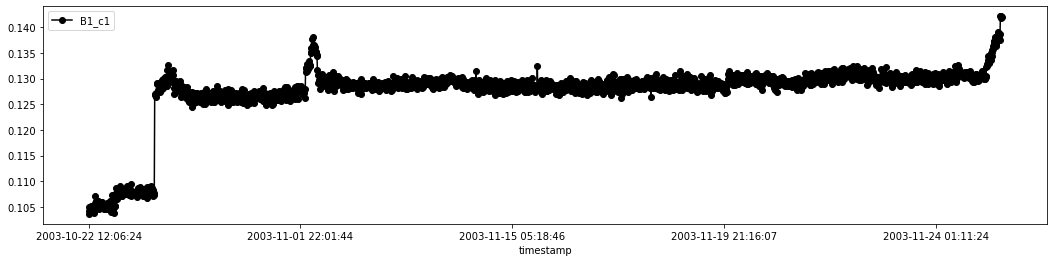

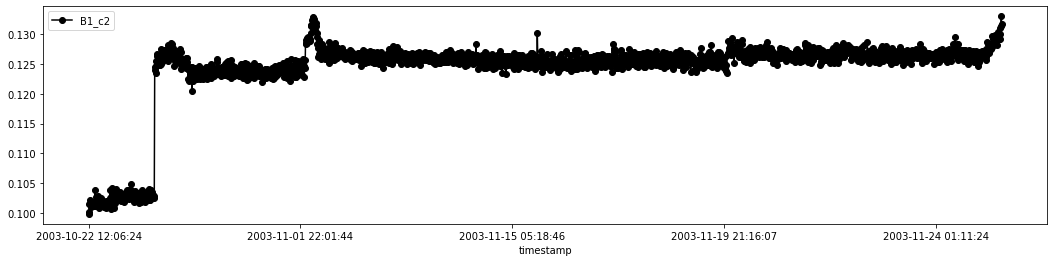

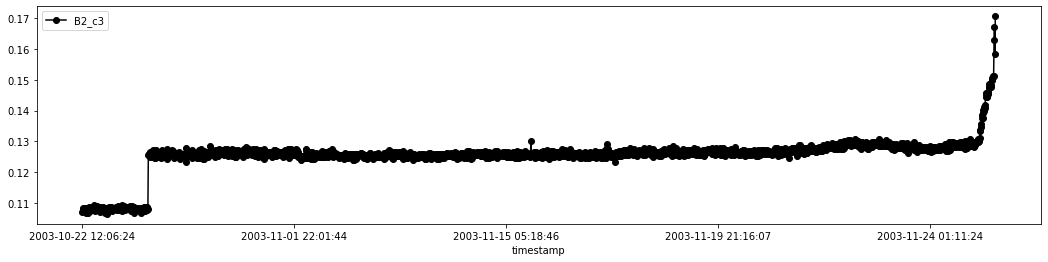

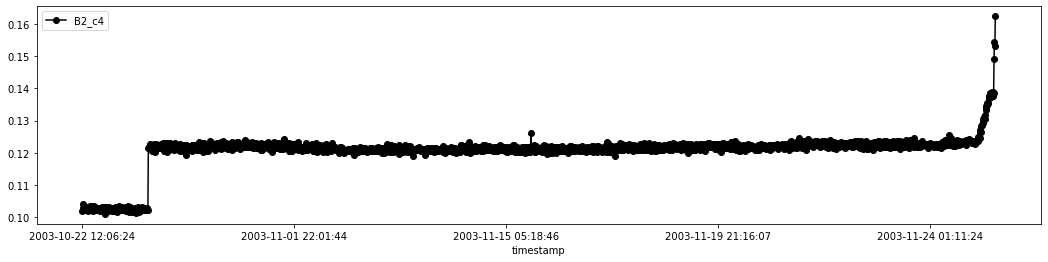

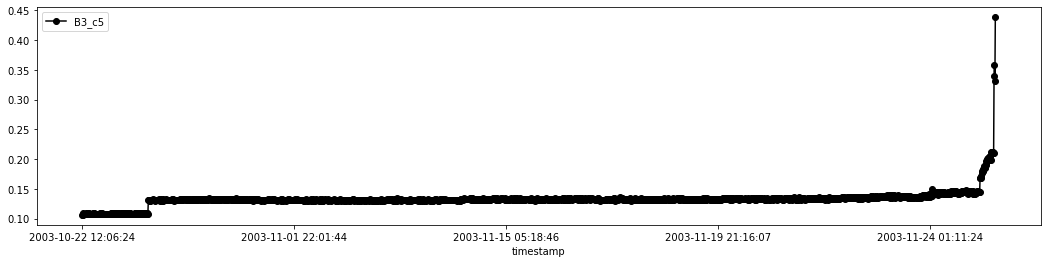

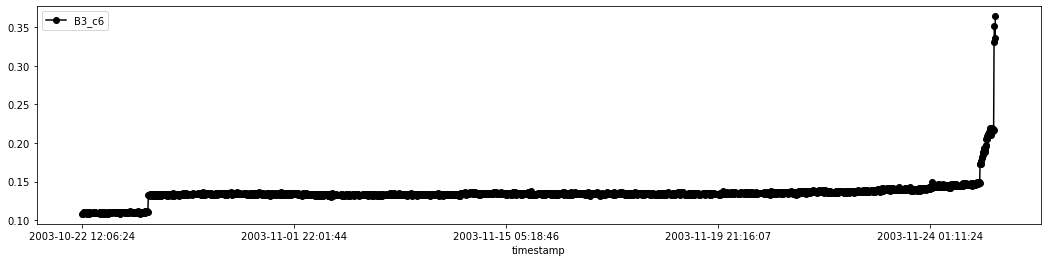

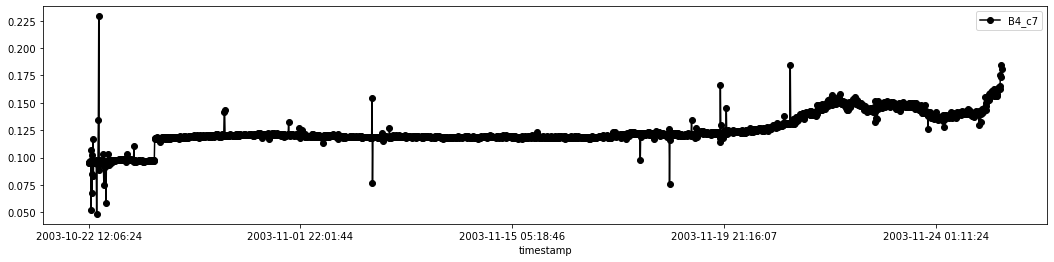

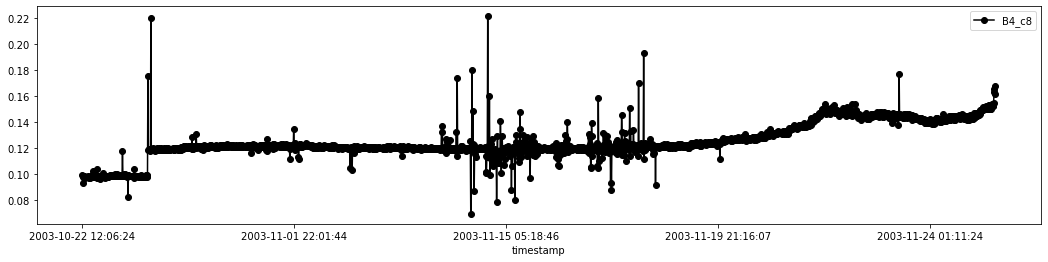

In [11]:
# Plot the downsampled signal
for chan in chans[1:]:
    df_set[[chan]].plot(figsize=(18, 4), color = 'black', marker = 'o');

In [12]:
df_set['B3_c6'].iloc[0:1500]

timestamp
2003-10-22 12:06:24    0.108150
2003-10-22 12:09:13    0.108458
2003-10-22 12:14:13    0.109875
2003-10-22 12:19:13    0.110010
2003-10-22 12:24:13    0.109350
                         ...   
2003-11-19 20:26:07    0.133737
2003-11-19 20:36:07    0.133706
2003-11-19 20:46:07    0.133287
2003-11-19 20:56:07    0.133740
2003-11-19 21:06:07    0.134090
Name: B3_c6, Length: 1500, dtype: float64

### PCA model: Principal Components analysis

In [13]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import gridspec
from matplotlib.pyplot import figure

In [14]:
# Normalize the data (min = 0, max = 1 for all columns)
scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_set), columns = df_set.columns, index = df_set.index)
df_scaled.describe()

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B4_c8
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.619142,0.734256,0.296744,0.319403,0.080298,0.104435,0.420265,0.366470
std,0.157732,0.188453,0.089611,0.090392,0.044367,0.056226,0.078011,0.089990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.628081,0.753310,0.295014,0.324541,0.075479,0.097948,0.388446,0.330615
50%,0.656036,0.784239,0.306088,0.336127,0.078572,0.101956,0.397263,0.341284
75%,0.680033,0.806664,0.322653,0.347719,0.082852,0.107866,0.446378,0.408970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Alternative is to standardize the data 
#scaler = preprocessing.StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df_set), columns = df_set.columns, index = df_set.index)
#df_scaled.describe()

In [16]:
df_scaled.index[0:980]

Index(['2003-10-22 12:06:24', '2003-10-22 12:09:13', '2003-10-22 12:14:13',
       '2003-10-22 12:19:13', '2003-10-22 12:24:13', '2003-10-22 12:29:13',
       '2003-10-22 12:34:13', '2003-10-22 12:39:13', '2003-10-22 12:44:13',
       '2003-10-22 12:49:13',
       ...
       '2003-11-15 00:18:46', '2003-11-15 00:28:46', '2003-11-15 00:38:46',
       '2003-11-15 00:48:46', '2003-11-15 00:58:46', '2003-11-15 01:08:46',
       '2003-11-15 01:18:46', '2003-11-15 01:28:46', '2003-11-15 01:38:46',
       '2003-11-15 01:48:46'],
      dtype='object', name='timestamp', length=980)

In [17]:
#t1_cuts = ['2003.11.15.05.18.46.000000', '2003.11.15.05.18.47.000000']
t1_cuts = ['2003-10-29 14:39:46', '2003-11-15 05:18:46', '2003-11-19 21:06:07']
#t2_cuts = ['2004-02-16 16:32:39', '2004-02-16 16:32:39']
#t2_cuts = ['2004.02.15.05.12.39.000000', '2004.02.15.05.12.39.000000']
t2_cuts = ['2004.02.14.05.12.39.000000', '2004.02.14.05.12.39.000000']
t3_cuts = ['2004.03.25.16.51.57.000000', '2004.03.25.16.51.57.000000']

# Select a cut to analyse
t_cuts = t1_cuts
#df_train = df_scaled[:t_cuts[0]]
df_train = df_scaled[t_cuts[0]:t_cuts[1]]
df_test = df_scaled[t_cuts[1]:]

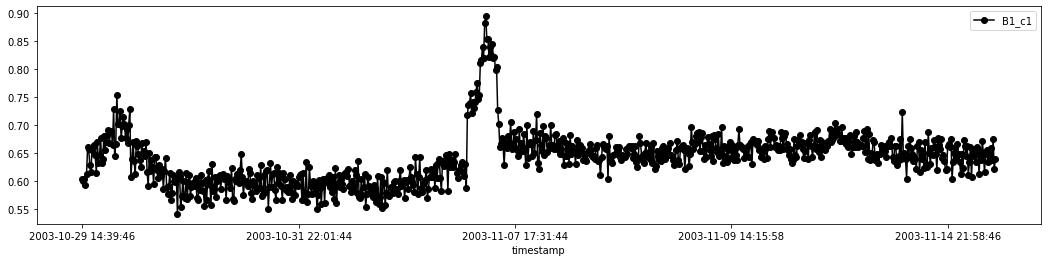

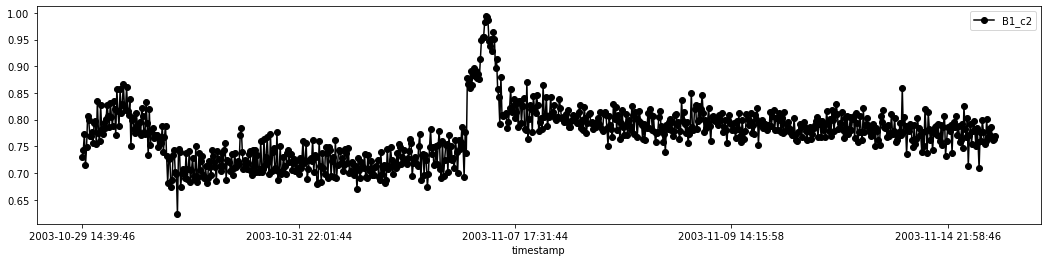

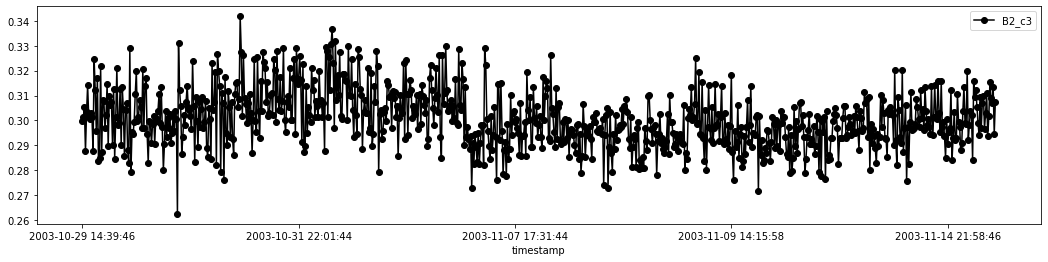

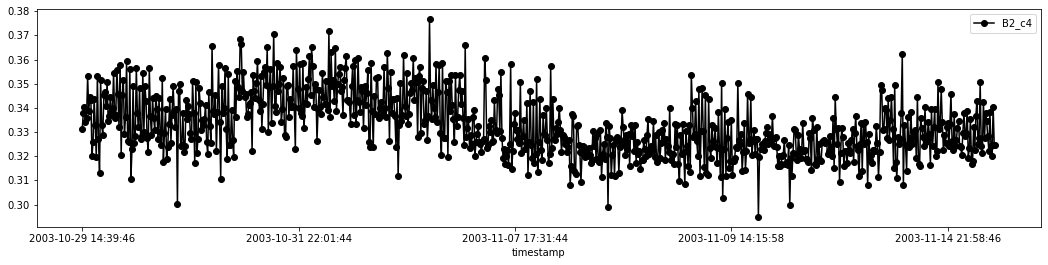

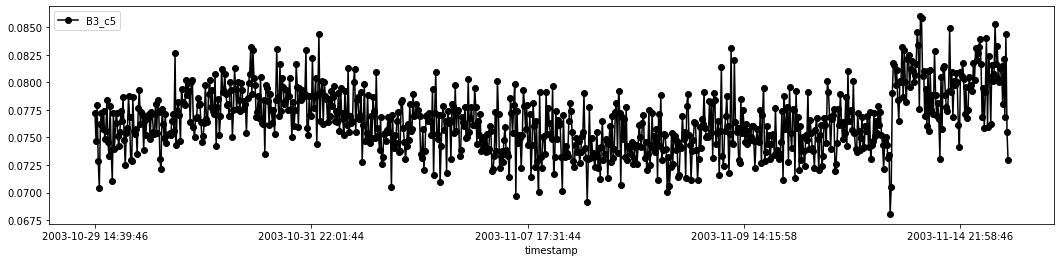

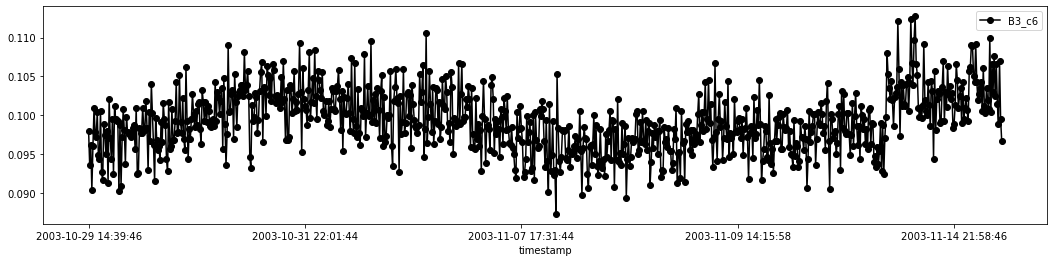

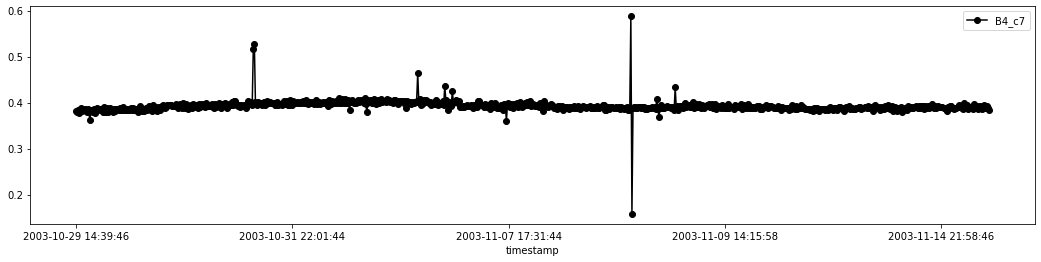

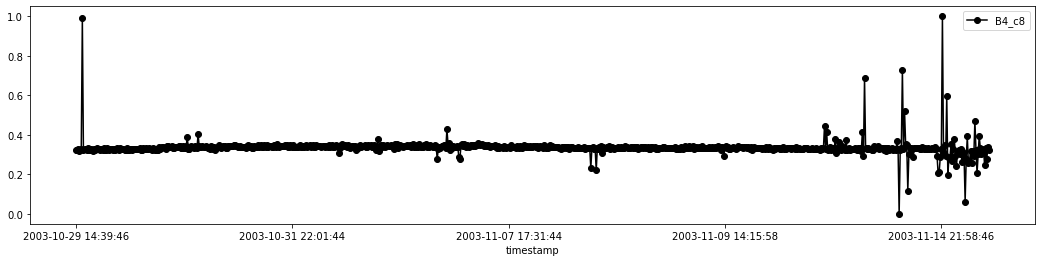

In [13]:
# Plot the downsampled train signals
for chan in chans[1:]:
    df_train[[chan]].plot(figsize=(18, 4), color = 'black', marker = 'o');

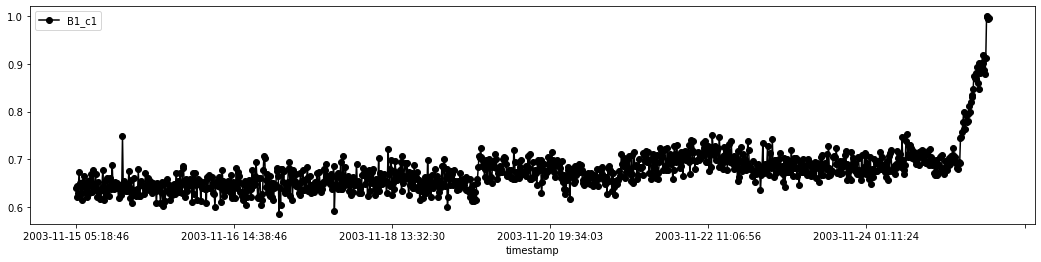

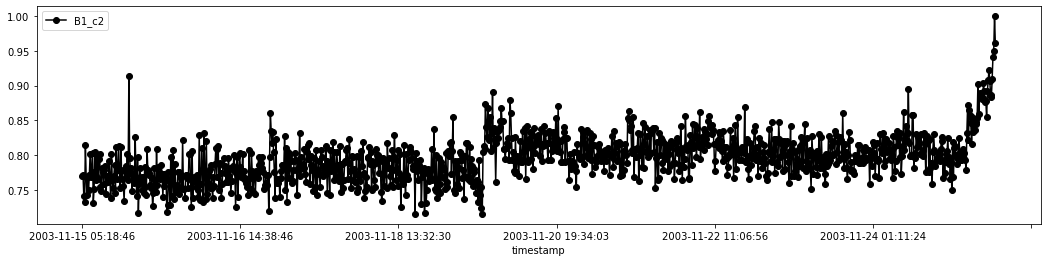

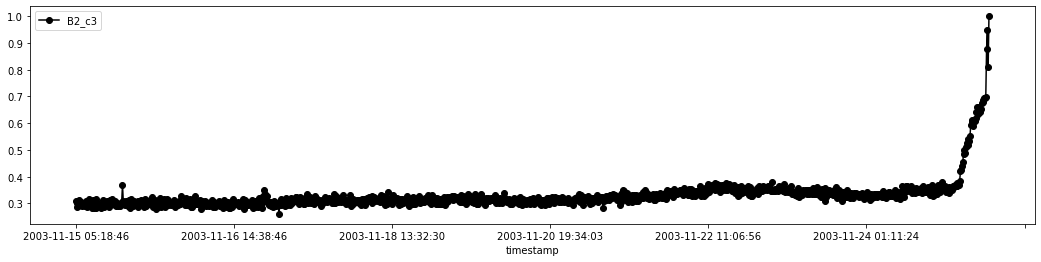

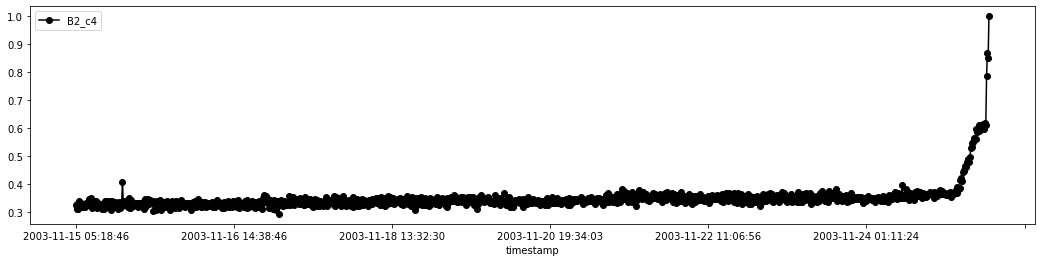

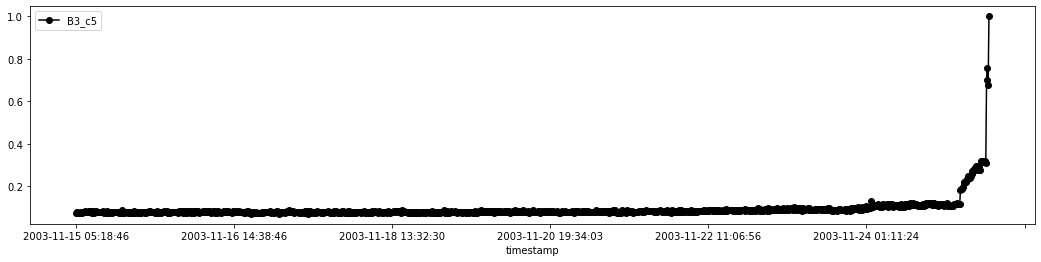

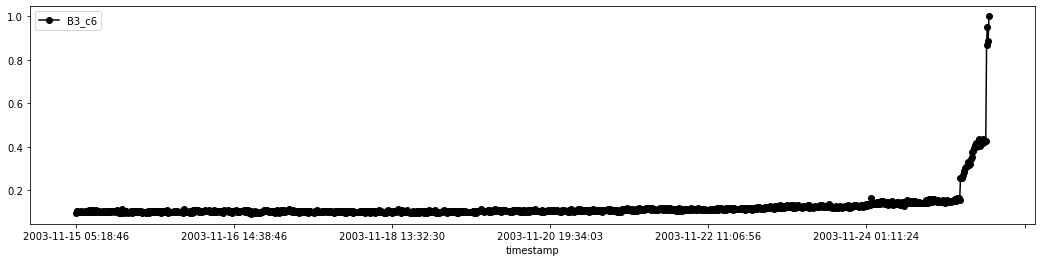

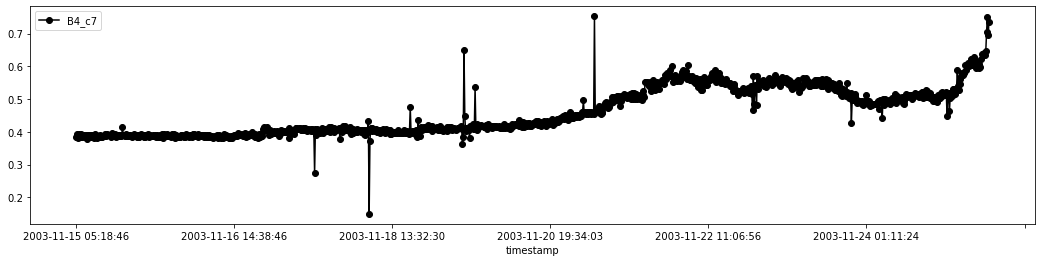

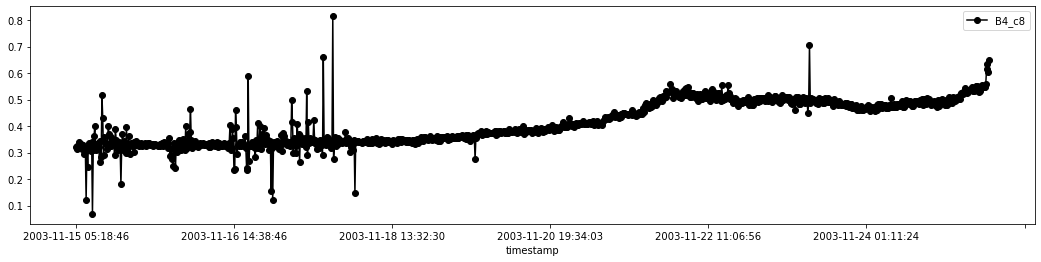

In [14]:
# Plot the downsampled test signals
for chan in chans[1:]:
    df_test[[chan]].plot(figsize=(18, 4), color = 'black', marker = 'o');

In [15]:
n_comps = len(chans)-1 # How many dimensions you want to reduce to
pca = PCA(n_components = n_comps, svd_solver = 'full')

In [16]:
# Compute all PCA components for the training set
X_train_PCA = pca.fit_transform(df_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
X_test_PCA = pca.transform(df_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

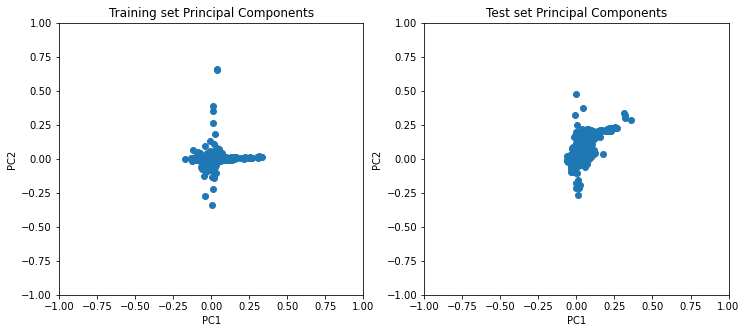

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1])
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-1, 1)
ax0.set_ylim(-1, 1)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:, 0], X_test_PCA.loc[:, 1])
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title('Test set Principal Components')

plt.show()

In [18]:
# 3 decimal places and don't use scientific notation
np.set_printoptions(precision = 3, suppress=True) 
pca.fit_transform(df_train)
print(pca.explained_variance_ratio_)

[0.61  0.292 0.04  0.027 0.022 0.006 0.002 0.   ]


In [19]:
pca = PCA(n_components = 2, svd_solver= 'full')

# Compute (2) PCA most relevant components FOR THE TRAINING SET
X_train_PCA = pca.fit_transform(df_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the TEST SET onto the PCA space (2 dimensions)
X_test_PCA = pca.transform(df_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

In [20]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [21]:
#cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [22]:
cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [23]:
# Mean of each column: PCA1, PCA2
# - It should be very close to zero
mean_distr = data_train.mean(axis = 0) # axis=0 means that average is computed per column
np.set_printoptions(precision = 3, suppress = False)
mean_distr

array([ 7.147e-17, -8.146e-18])

In [24]:
dist_test = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

print("Minimum & maximum MD in training set:", min(dist_train), max(dist_train) )
print("Minimum & maximum MD in test set    :", min(dist_test), max(dist_test) )

Minimum & maximum MD in training set: 0.032996949616441194 14.412570014868127
Minimum & maximum MD in test set    : 0.021224830965808288 10.39657099081802


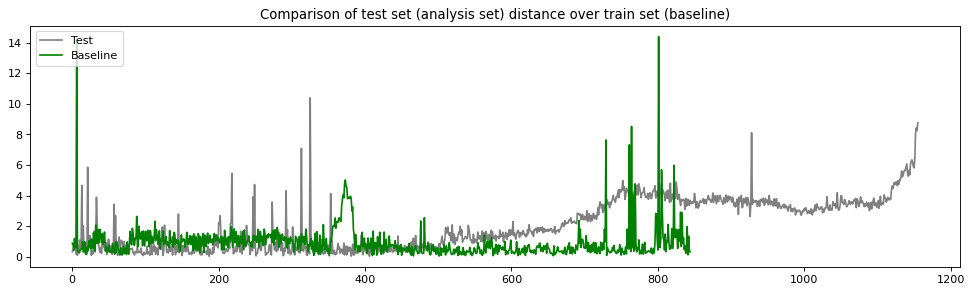

In [25]:
figure(figsize=(15, 4), dpi=80)
plt.plot(np.array(dist_test), label = "Test", color = 'grey')
plt.plot(np.array(dist_train) , label = "Baseline", color = 'green')
plt.legend(loc="upper left")
plt.title("Comparison of test set (analysis set) distance over train set (baseline)")
plt.show()

In [26]:
import PdM_functions as pdm
threshold = pdm.MD_threshold(dist_train, extreme = True)
#  * extreme = True => twice the mean of incoming data (dist_train)
#  * extreme = False => three times the mean
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold) )

Threshold value for flagging an anomaly is 2.75


In [27]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the baseline (train set)')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [34]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers_train / anomaly_train.shape[0]), 2)) + '%')

There are 30 anomalies in the train set out of 845 points
Corresponding to 3.55%


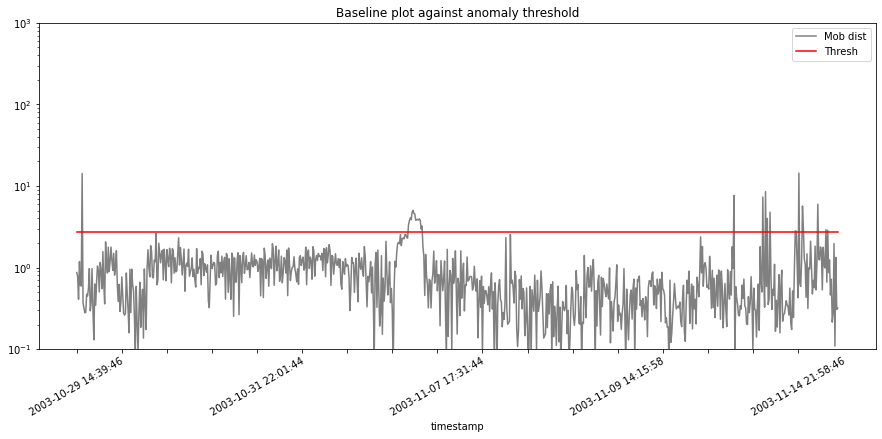

In [35]:
anomaly_train.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_train.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Baseline plot against anomaly threshold')
plt.show()

In [36]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

n_outliers = anomaly[anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers / anomaly.shape[0]), 2)) + '%')

There are 454 anomalies in the test set out of 1156 points
Corresponding to 39.27%


In [37]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
timestamp,,,
2003-11-15 05:18:46,0.317739,2.754836,False
2003-11-15 05:28:46,0.464005,2.754836,False
2003-11-15 05:38:46,0.591280,2.754836,False
2003-11-15 05:48:46,0.675502,2.754836,False
2003-11-15 05:58:46,0.781109,2.754836,False


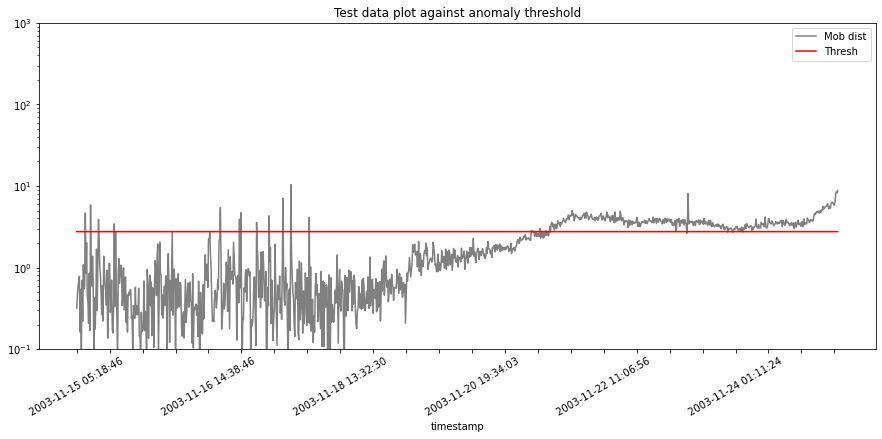

In [38]:
anomaly.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Test data plot against anomaly threshold')
plt.show()

In [39]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

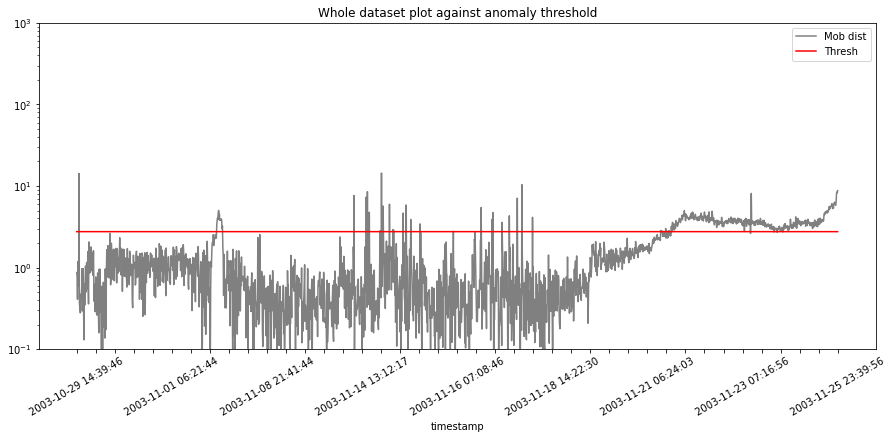

In [40]:
anomaly_alldata.plot(logy=True, figsize = (15,6), ylim = [1e-1,1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Whole dataset plot against anomaly threshold')
plt.show()

### Robust PCA

In [97]:
# Compute all PCA components for the training set
# L = Low rank data (resistant to outliers)
# S = Sparse (outliers)
L_train, S = pdm.R_pca(df_train).fit()
X_train_PCA = pca.fit_transform(L_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = df_train.index

# Project the test data onto the PCA space
L_test, S = pdm.R_pca(df_test).fit()
X_test_PCA = pca.transform(L_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = df_test.index

iteration: 1, error: 0.5382239881183624
iteration: 100, error: 0.003678104328761201
iteration: 200, error: 0.002366800342773941
iteration: 300, error: 0.0009751675680153627
iteration: 400, error: 0.00040575438081862574
iteration: 500, error: 0.0001533846233063192
iteration: 600, error: 0.00011237206472493113
iteration: 700, error: 5.2151412949511475e-05
iteration: 757, error: 1.3148181272025751e-05
iteration: 1, error: 0.530951457786332
iteration: 100, error: 0.0033241105131966956
iteration: 200, error: 0.0026860490170091543
iteration: 300, error: 0.0010425306019739226
iteration: 400, error: 0.0005218004874458862
iteration: 500, error: 0.00026023179926234417
iteration: 600, error: 0.00019607706928084055
iteration: 700, error: 9.45899843087018e-05
iteration: 800, error: 3.6939247071019446e-05
iteration: 840, error: 1.4232426566979954e-05


C:\Users\jpayn\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


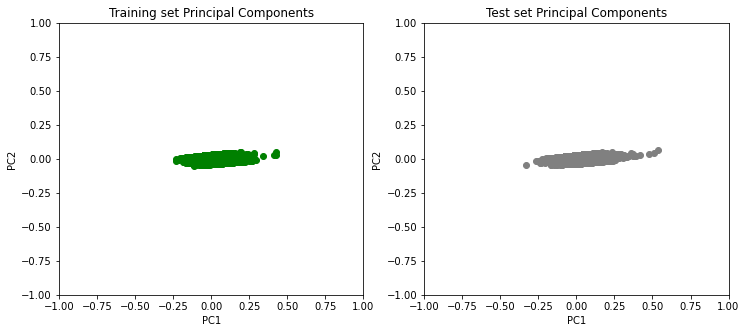

In [98]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 1])

ax0 = plt.subplot(gs[0])
ax0.scatter(X_train_PCA.loc[:, 0], X_train_PCA.loc[:, 1], color = 'green')
ax0.set_xlabel('PC1')
ax0.set_ylabel('PC2')
ax0.set_xlim(-1, 1)
ax0.set_ylim(-1, 1)
ax0.set_title('Training set Principal Components')

ax1 = plt.subplot(gs[1])
ax1.scatter(X_test_PCA.loc[:, 0], X_test_PCA.loc[:, 1], color = 'grey')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_title('Test set Principal Components')

plt.show()

In [99]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [100]:
cov_matrix = np.cov(data_train, rowvar = False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [101]:
# Mean of each column: PCA1, PCA2
# - It should be very close to zero
mean_distr = data_train.mean(axis = 0) # axis = 0 means that average is computed per column
np.set_printoptions(precision = 3, suppress=False)
mean_distr

array([-2.533e-16,  1.889e-15])

In [102]:
dist_test = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = pdm.MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)

In [103]:
# Calculate anomaly threshold distance
threshold = pdm.MD_threshold(dist_train, extreme = True) # extreme is 3x mean
print("Threshold value for flagging an anomaly is", "{:.2f}".format(threshold) )

Threshold value for flagging an anomaly is 3.74


C:\Users\jpayn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


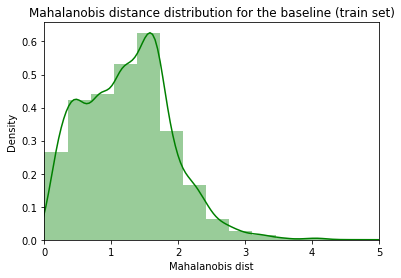

In [104]:
import seaborn as sns
plt.figure()
sns.distplot(dist_train,
             bins = 20, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')
plt.title('Mahalanobis distance distribution for the baseline (train set)')
plt.show()

In [105]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist'] = dist_train
anomaly_train['Thresh'] = threshold

# If Mob dist is above threshold then flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

n_outliers_train = anomaly_train[ anomaly_train['Anomaly'] == True].shape[0]
print("There are", n_outliers_train, "anomalies in the train set out of", anomaly_train.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers_train / anomaly_train.shape[0]), 2)) + '%')

There are 27 anomalies in the train set out of 10001 points
Corresponding to 0.27%


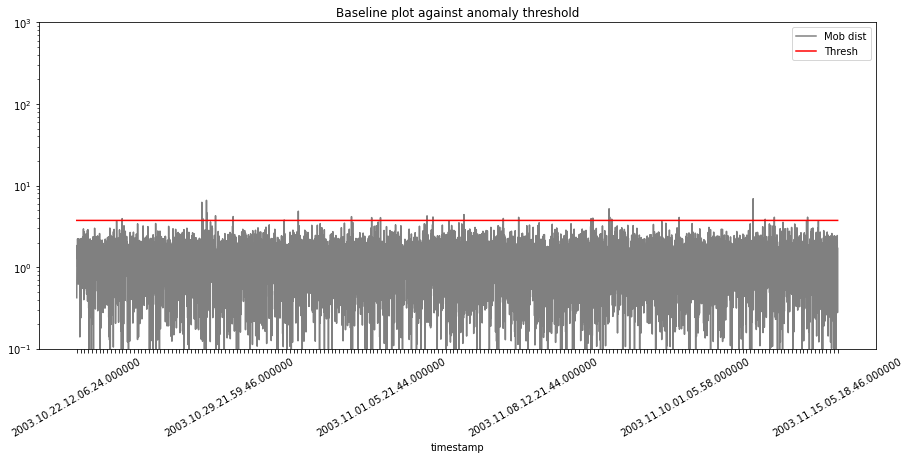

In [106]:
anomaly_train.plot(logy=True, figsize = (15, 6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_train.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Baseline plot against anomaly threshold')
plt.show()

In [107]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold

# If Mob dist is above threshold then flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index

n_outliers = anomaly[ anomaly['Anomaly'] == True].shape[0]
print("There are", n_outliers, "anomalies in the test set out of", anomaly.shape[0], "points")
print("Corresponding to " + str(round(100*(n_outliers / anomaly.shape[0]), 2)) + '%')

There are 79 anomalies in the test set out of 11551 points
Corresponding to 0.68%


In [108]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
timestamp,,,
2003.11.15.05.18.47.023950,1.125278,3.736785,False
2003.11.15.05.28.46.000000,1.721135,3.736785,False
2003.11.15.05.28.46.113750,2.006149,3.736785,False
2003.11.15.05.28.46.227550,0.400671,3.736785,False
2003.11.15.05.28.46.341300,0.724087,3.736785,False


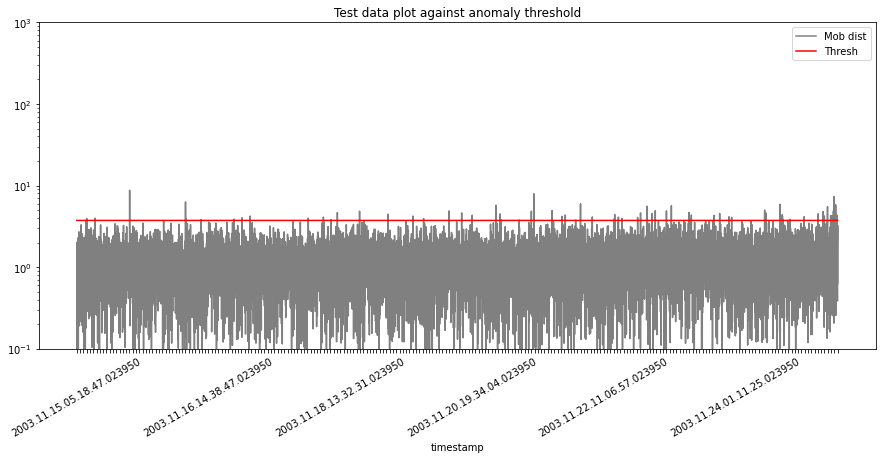

In [109]:
anomaly.plot(logy=True, figsize = (15,6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Test data plot against anomaly threshold')
plt.show()

In [110]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

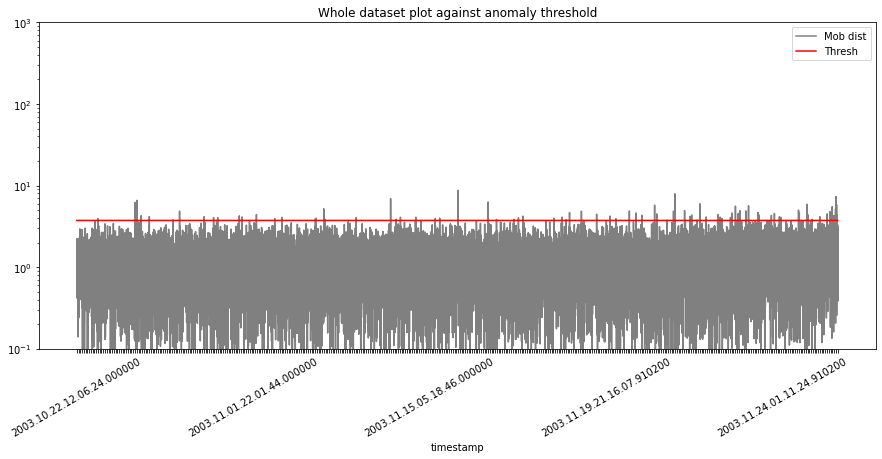

In [111]:
anomaly_alldata.plot(logy = True, figsize = (15, 6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Whole dataset plot against anomaly threshold')
plt.show()

### One-class Support Vector Machine (SVM)

In [112]:
from sklearn.svm import OneClassSVM

# An estimation of anomly population of the dataset (necessary for several algorithms)
outliers_fraction = 0.01

# train one class SVM 
svm_model =  OneClassSVM(nu = 0.95 * outliers_fraction) #nu=0.95 * outliers_fraction  + 0.05
svm_model.fit(pd.DataFrame(df_train))

OneClassSVM(nu=0.0095)

In [113]:
print('Train & test windows:')
print([df_train.index[0], df_train.index[-1]])
print([df_test.index[0], df_test.index[-1]])

Train & test windows:
['2003.10.22.12.06.24.000000', '2003.11.15.05.18.46.000000']
['2003.11.15.05.18.47.023950', '2003.11.25.23.39.57.023950']


In [114]:
#df_test.drop('anomaly', axis = 1, inplace = True)

In [115]:
preds = pd.Series(svm_model.predict(df_test))
test = pd.DataFrame({'B3_c5':pd.Series(df_test['B3_c5'])})
svm_out = pd.DataFrame({'timestamp':df_test.index, 'Prediction':preds})

In [116]:
B3_c5 = df_test['B3_c5']
B3_c5 = B3_c5.reset_index()
B3_c5.drop('timestamp', axis = 1, inplace = True)
svm_out['B3_c5'] = B3_c5
svm_out['Prediction'] = svm_out['Prediction'].map( {1: 0, -1: 1} )
svm_out

,timestamp,Prediction,B3_c5
0,2003.11.15.05.18.47.023950,0,0.466777
1,2003.11.15.05.28.46.000000,0,0.452231
2,2003.11.15.05.28.46.113750,0,0.518347
3,2003.11.15.05.28.46.227550,0,0.465785
4,2003.11.15.05.28.46.341300,0,0.456860
...,...,...,...
11546,2003.11.25.23.39.56.568850,1,0.624793
11547,2003.11.25.23.39.56.682650,0,0.401983
11548,2003.11.25.23.39.56.796400,1,0.737851
11549,2003.11.25.23.39.56.910200,1,0.690909


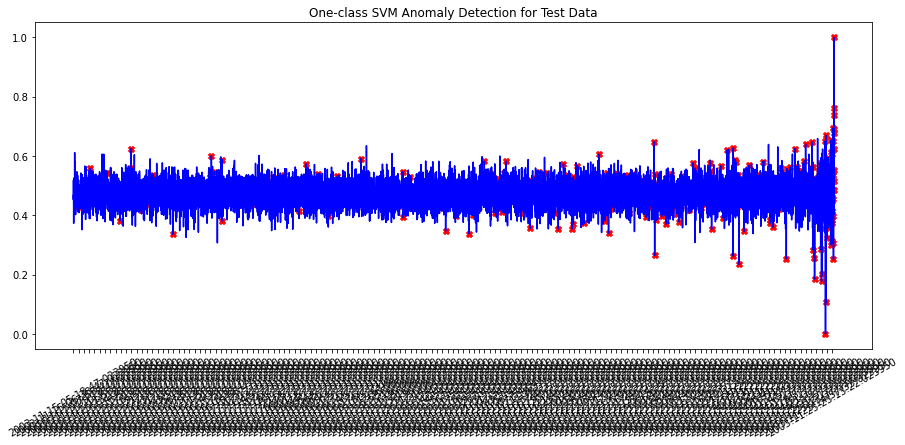

In [117]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 80), fontsize = 10, rotation = 30)
plt.title('One-class SVM Anomaly Detection for Test Data')

a = svm_out.loc[svm_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly

#lin, = ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', lw=1)
#mark, = ax.plot(df_test.index, df_test['B3_c5'], color = 'blue', marker='o', alpha=0.1, ms=5)

ax.plot(df_test.index, df_test['B3_c5'], color = 'blue')
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X')

plt.show()

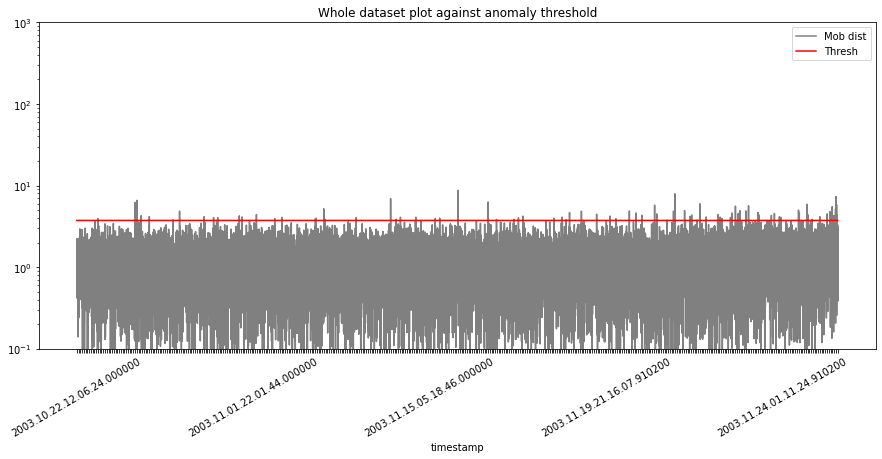

In [118]:
anomaly_alldata.plot(logy = True, figsize = (15, 6), ylim = [1e-1, 1e3], color = ['grey', 'red'])
plt.xticks(np.arange(0, anomaly_alldata.shape[0], 50), fontsize=10, rotation = 30)
plt.title('Whole dataset plot against anomaly threshold')
plt.show()

### Isolation Forest

In [119]:
from sklearn.ensemble import IsolationForest

# Define outlier fraction
outliers_fraction = 0.10

# Train isolation forest 
isfo_model =  IsolationForest(contamination = outliers_fraction)
isfo_model.fit(df_train)

C:\Users\jpayn\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [120]:
# Create and format predictions for test data
isfo_preds = pd.Series(isfo_model.predict(df_test))
isfo_test = pd.DataFrame({'B3_c5':pd.Series(df_test['B3_c5'])})
isfo_out = pd.DataFrame({'timestamp':df_test.index, 'Prediction':preds})

C:\Users\jpayn\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [121]:
B3_c5 = df_test['B3_c5']
B3_c5 = B3_c5.reset_index()
B3_c5.drop('timestamp', axis = 1, inplace = True)
isfo_out['B3_c5'] = B3_c5
isfo_out['Prediction'] = isfo_out['Prediction'].map( {1: 0, -1: 1} )

In [122]:
num_anomaly_pts = sum(isfo_out['Prediction'] == 1)
all_test_pts = len(df_test)
print(str(num_anomaly_pts ) + ' out of ' + str(all_test_pts) + ' data points classified as anomalies')
print(str(round(100 * (num_anomaly_pts / all_test_pts), 2)) + '% of the data')

509 out of 11551 data points classified as anomalies
4.41% of the data


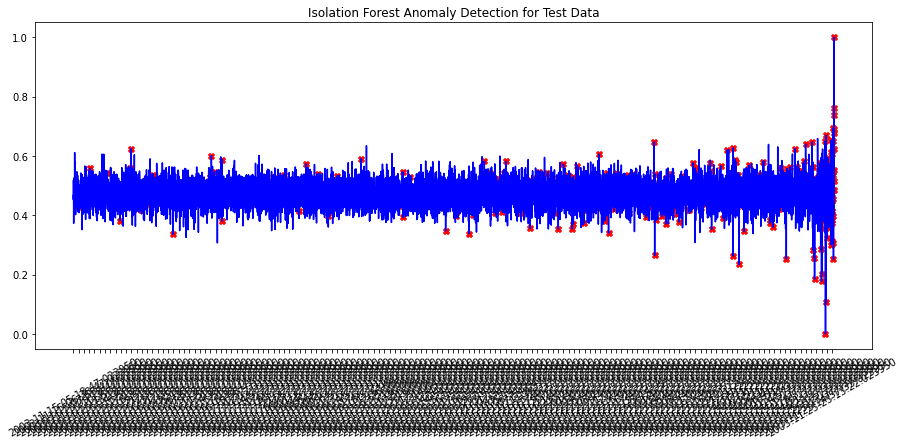

In [123]:
# visualisation of anomaly detection throughout time 
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 80), fontsize = 10, rotation = 30)
plt.title('Isolation Forest Anomaly Detection for Test Data')
a = isfo_out.loc[isfo_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly
ax.plot(df_test.index, df_test['B3_c5'], color = 'blue')
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X')
plt.show()

### Recurrent Nueral Network (RNN)

RNN learn to recognize sequence in the data and then make prediction based on the previous sequence. We consider an anomaly when the next data points are distant from RNN prediction. Aggregation, size of sequence and size of prediction for anomaly are important parameters to have relevant detection.
Here we make learn from 50 previous values, and we predict just the 1 next value.

In [79]:
df_train

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B4_c8
timestamp,,,,,,,,
2003-10-29 14:39:46,0.604666,0.730349,0.299900,0.331158,0.077172,0.097959,0.382290,0.324803
2003-10-29 14:49:46,0.599888,0.743683,0.301193,0.337885,0.074672,0.093611,0.380017,0.324094
2003-10-29 14:59:46,0.604313,0.772769,0.305333,0.340525,0.077952,0.096182,0.383569,0.328961
2003-10-29 15:09:46,0.593715,0.714176,0.287656,0.334295,0.072831,0.090445,0.377647,0.317756
2003-10-29 15:19:46,0.613412,0.747758,0.303366,0.335805,0.070411,0.096027,0.384620,0.325167
...,...,...,...,...,...,...,...,...
2003-11-15 04:38:46,0.659047,0.786985,0.309080,0.324126,0.082094,0.101486,0.387228,0.247654
2003-11-15 04:48:46,0.638161,0.765142,0.307091,0.320137,0.076827,0.098930,0.391377,0.335853
2003-11-15 04:58:46,0.674987,0.760873,0.313440,0.340376,0.084379,0.106942,0.392801,0.275371


In [80]:
df_test

,B1_c1,B1_c2,B2_c3,B2_c4,B3_c5,B3_c6,B4_c7,B4_c8
timestamp,,,,,,,,
2003-11-15 05:18:46,0.639133,0.769503,0.307227,0.324729,0.072958,0.096745,0.384899,0.322309
2003-11-15 05:28:46,0.643195,0.771423,0.299781,0.329953,0.078351,0.105785,0.391992,0.315282
2003-11-15 05:38:46,0.621971,0.740857,0.286102,0.312195,0.079247,0.104610,0.384013,0.324458
2003-11-15 05:48:46,0.629266,0.731537,0.288456,0.311822,0.075486,0.097682,0.382497,0.318954
2003-11-15 05:58:46,0.672644,0.814383,0.314092,0.339543,0.076844,0.099636,0.392379,0.341368
...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.912646,0.909857,0.699602,0.612236,0.312073,0.426733,0.646423,0.560309
2003-11-25 23:13:21,1.000000,0.941276,0.877622,0.786057,0.701757,0.867462,0.703787,0.616399
2003-11-25 23:19:56,0.998734,0.950516,0.947594,0.869047,0.757422,0.951553,0.752011,0.632839


In [81]:
data_n = df_scaled

# important parameters and train/test size
prediction_time = 1 
testdatasize = 700
unroll_length = 50 # consider n last datapoints (this will be sequence length)
testdatacut = testdatasize + unroll_length  + 1

pred_chan = 'B3_c5'

# train data
x_train = df_scaled[0:-prediction_time-testdatacut].values
y_train = df_scaled[prediction_time:-testdatacut][pred_chan].values

# test data
x_test = df_scaled[0-testdatacut:-prediction_time].values
y_test = df_scaled[prediction_time-testdatacut:][pred_chan].values

# See the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1404, 8)
y_train (1404,)
x_test (750, 8)
y_test (750,)


In [82]:
#unroll: create sequence of 50 previous data points for each data points
def unroll(data, sequence_length = 24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# Adapt the datasets for the sequence data shape
x_train = unroll(x_train, unroll_length)
x_test  = unroll(x_test, unroll_length)
y_train = y_train[-x_train.shape[0]:]
y_test  = y_test[-x_test.shape[0]:]

# See the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1354, 50, 8)
y_train (1354,)
x_test (700, 50, 8)
y_test (700,)


In [83]:
# Load libraries for RNN
# Keras acts as an interface for the TensorFlow library
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from keras.models import model_from_json
import sys

In [86]:
# Build the model
lstm_model = Sequential()

In [87]:
lstm_model.add(LSTM(
    #input_shape = x_train.shape[-1],
    #output_dim = 50,
    return_sequences = True,
    units = 50))

In [88]:
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(
    100,
    return_sequences=False))

lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(
    units=1))

lstm_model.add(Activation('linear'))

start = time.time()
lstm_model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : {}'.format(time.time() - start))

compilation time : 0.011955738067626953


In [89]:
# Train the model
#nb_epoch = 350

lstm_model.fit(
    x_train,
    y_train,
    batch_size = 3028,
    epochs = 30,
    validation_split = 0.1)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.0311 - val_loss: 0.1960
Epoch 2/30
1/1 [==============================] - 0s 50ms/step - loss: 0.1795 - val_loss: 0.0042
Epoch 3/30
1/1 [==============================] - 0s 50ms/step - loss: 0.0049 - val_loss: 3.3034e-04
Epoch 4/30
1/1 [==============================] - 0s 46ms/step - loss: 0.0017 - val_loss: 2.9756e-05
Epoch 5/30
1/1 [==============================] - 0s 66ms/step - loss: 0.0013 - val_loss: 1.5034e-05
Epoch 6/30
1/1 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 1.1812e-05
Epoch 7/30
1/1 [==============================] - 0s 42ms/step - loss: 0.0013 - val_loss: 8.8751e-06
Epoch 8/30
1/1 [==============================] - 0s 57ms/step - loss: 0.0013 - val_loss: 8.6981e-06
Epoch 9/30
1/1 [==============================] - 0s 56ms/step - loss: 0.0013 - val_loss: 8.7071e-06
Epoch 10/30
1/1 [==============================] - 0s 66ms/step - loss: 0.0012 - val_loss: 1.0258e-05

In [90]:
# Create the list of difference between prediction and test data
loaded_model = lstm_model
diff = []
ratio = []
p = loaded_model.predict(x_test)
# Predictions = lstm.predict_sequences_multiple(loaded_model, x_test, 50, 50)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

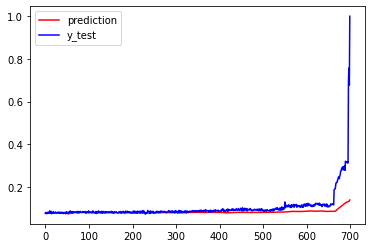

In [91]:
# plot the prediction and the reality (for the test data)
fig, axs = plt.subplots()
axs.plot(p, color = 'red', label = 'prediction')
axs.plot(y_test, color = 'blue', label = 'y_test')
plt.legend(loc = 'upper left')
plt.show()

In [141]:
outliers_fraction = 0.10 # Results for 0.3 is also interesting! 

# select the most distant prediction/reality data points as anomalies
diff = pd.Series(diff)
number_of_outliers = int(outliers_fraction * len(diff))
print('Number of outliers: ' + str(number_of_outliers))

threshold = diff.nlargest(number_of_outliers).min()
print('Threshold: ' + str(round(threshold, 4)))

# data with anomaly label (test data part)
test = (diff >= threshold).astype(int)

# the training data part where we didn't predict anything (overfitting possible): no anomaly
complement = pd.Series(0, index=np.arange(len(data_n) - testdatasize))


Number of outliers: 210
Threshold: 0.0127


In [142]:
diff.nlargest(70)

699    0.861501
697    0.625532
696    0.570353
698    0.542776
689    0.195414
         ...   
607    0.032094
573    0.031256
658    0.031216
558    0.030973
636    0.030944
Length: 70, dtype: float64

In [143]:
# Create and format predictions for test data
lstm_preds = complement.append(test, ignore_index = 'True')
lstm_test = pd.DataFrame({'B3_c5':pd.Series(data_n['B3_c5'])})
lstm_out = pd.DataFrame({'timestamp':data_n.index, 'Prediction':lstm_preds})

In [144]:
df_test = df_scaled
B3_c5 = df_test['B3_c5']
B3_c5 = B3_c5.reset_index()
B3_c5.drop('timestamp', axis = 1, inplace = True)
lstm_out['B3_c5'] = B3_c5
#lstm_out['Prediction'] = lstm_out['Prediction'].map( {1: 0, -1: 1} )
lstm_out

,timestamp,Prediction,B3_c5
0,2003-10-22 12:06:24,0,0.000000
1,2003-10-22 12:09:13,0,0.001542
2,2003-10-22 12:14:13,0,0.007800
3,2003-10-22 12:19:13,0,0.005777
4,2003-10-22 12:24:13,0,0.006938
...,...,...,...
2151,2003-11-25 16:07:32,1,0.312073
2152,2003-11-25 23:13:21,1,0.701757
2153,2003-11-25 23:19:56,1,0.757422
2154,2003-11-25 23:29:56,1,0.677214


In [145]:
num_anomaly_pts = sum(lstm_out['Prediction'] == 1)
all_test_pts = len(y_test)
print(str(num_anomaly_pts ) + ' out of ' + str(all_test_pts) + ' data points classified as anomalies')
print(str(round(100 * (num_anomaly_pts / all_test_pts), 2)) + '% of the data')

210 out of 700 data points classified as anomalies
30.0% of the data


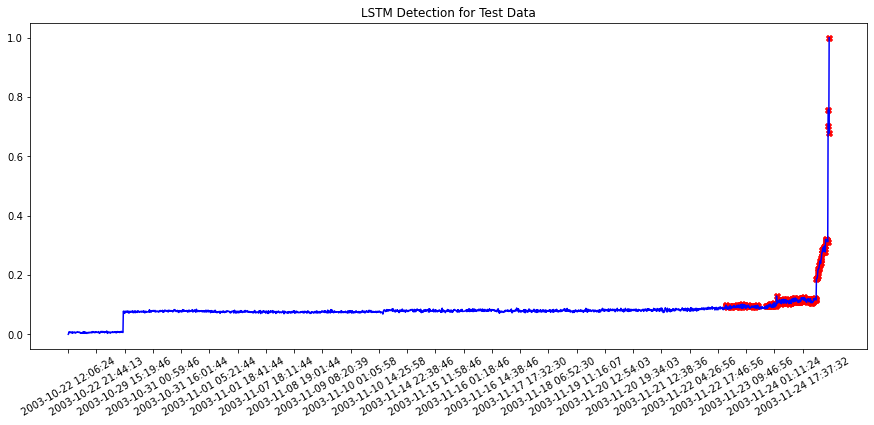

In [146]:
# visualisation of anomaly detection throughout time 
fig, ax = plt.subplots(figsize = (15, 6))
plt.xticks(np.arange(0, df_test.shape[0], 80), fontsize = 10, rotation = 30)
plt.title('LSTM Detection for Test Data')
a = lstm_out.loc[lstm_out['Prediction'] == 1, ['timestamp', 'B3_c5']] # anomaly
ax.plot(df_test.index, df_test['B3_c5'], color = 'blue')
ax.scatter(a['timestamp'], a['B3_c5'], color ='red', marker = 'X')
plt.show()